In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('/Users/apple/Desktop/5293/project/saartot.xlsx', header=None)
df.head()

,0,1,2,3,4
0,2019-02-28,16.56,-0.04,-0.0024,0.0
1,2019-01-31,16.60,-0.90,-0.0514,0.0
2,NaT,0.00,0.00,0.0000,0.0
3,2018-12-31,17.50,0.10,0.0057,0.0
4,2018-11-30,17.40,-0.10,-0.0057,0.0


In [3]:
car_price = df.iloc[:,0:-1]

In [4]:
car_price.columns = ['Date', 'Price', 'Change', 'Percent Change']
car_price['Date'] = car_price['Date'].astype(str)

In [5]:
car_price = car_price.loc[[i for i in range(248) if not car_price.loc[i,'Date'][0]!= '2'], :]

In [6]:
car_price.head()

,Date,Price,Change,Percent Change
0,2019-02-28,16.56,-0.04,-0.0024
1,2019-01-31,16.60,-0.90,-0.0514
3,2018-12-31,17.50,0.10,0.0057
4,2018-11-30,17.40,-0.10,-0.0057
5,2018-10-31,17.50,0.10,0.0057


In [7]:
feature_df = df.iloc[:, 0:-3]

In [8]:
feature_df.head()

,0,1
0,2019-02-28,16.56
1,2019-01-31,16.60
2,NaT,0.00
3,2018-12-31,17.50
4,2018-11-30,17.40


In [9]:
feature_df = pd.read_csv('/Users/apple/Desktop/5293/project/car_data_clean-master-2/car_data_clean.csv')

In [10]:
feature_df.head()

,Unnamed: 0,Date,Audi,BMW,Mercedes Benz,Mitsubishi Fuso,FCA,General Motors,Honda Group,Hyundai,...,Volkswagen,Volvo,Imported,Light Trucks,Domestic,Cars,Mini,Light Vehicles,Medium Duty Trucks,Hybrid/Electric/Fuel Cell Vehicles
0,9,Jan 2019,14253,18102,23721,0,136082,0,106139,42020,...,23074,5854,226484,468419,511241,252564,2457,135396,0,0
1,10,Dec 2018,22765,34357,36132,4,196520,0,155115,65721,...,32047,8826,336987,880440,938357,370718,2797,408603,6985,0
2,11,Nov 2018,17082,28330,32879,3,181310,0,120534,57499,...,26789,8181,290784,742197,802277,328741,3528,370345,6056,0
3,12,Oct 2018,16056,23262,31719,4,177391,0,122182,53025,...,29000,7327,276661,713369,794920,339215,3166,361991,6628,0
4,13,Sep 2018,19319,25908,30617,3,199819,0,132668,57359,...,30555,8715,302174,782222,854461,351203,3461,389503,6491,0


In [11]:
car_price.index = np.arange(230)

In [12]:
car_price['Direction'] = car_price['Percent Change'].apply(lambda x: 0 if x<0 else 1)

In [13]:
car_price.tail()

,Date,Price,Change,Percent Change,Direction
225,2000-05-31,17.47,-0.14,-0.0078,0
226,2000-04-30,17.61,-0.37,-0.0203,0
227,2000-03-31,17.98,-1.02,-0.0536,0
228,2000-02-29,18.99,0.70,0.0380,1
229,2000-01-31,18.30,0.40,0.0223,1


In [14]:
feature_df.columns

Index(['Unnamed: 0', 'Date', 'Audi', 'BMW', 'Mercedes Benz', 'Mitsubishi Fuso',
       'FCA', 'General Motors', 'Honda Group', 'Hyundai', 'Isuzu',
       'Jaguar Land Rover', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Porsche',
       'Subaru', 'Tesla', 'Toyota Group', 'Volkswagen', 'Volvo', 'Imported',
       'Light Trucks', 'Domestic', 'Cars', 'Mini', 'Light Vehicles',
       'Medium Duty Trucks', 'Hybrid/Electric/Fuel Cell Vehicles'],
      dtype='object')

In [15]:
full_df = car_price.iloc[0:-1,:].join(feature_df,how='right',lsuffix='_dep', rsuffix='_indep')
full_df = full_df.drop(columns = 'Unnamed: 0')

In [16]:
full_df.columns

Index(['Date_dep', 'Price', 'Change', 'Percent Change', 'Direction',
       'Date_indep', 'Audi', 'BMW', 'Mercedes Benz', 'Mitsubishi Fuso', 'FCA',
       'General Motors', 'Honda Group', 'Hyundai', 'Isuzu',
       'Jaguar Land Rover', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Porsche',
       'Subaru', 'Tesla', 'Toyota Group', 'Volkswagen', 'Volvo', 'Imported',
       'Light Trucks', 'Domestic', 'Cars', 'Mini', 'Light Vehicles',
       'Medium Duty Trucks', 'Hybrid/Electric/Fuel Cell Vehicles'],
      dtype='object')

### finish cleaning data
### start xgboost tree classification

In [17]:
y = full_df['Direction']
x = full_df[full_df.columns[6::]]

In [18]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
scalar = StandardScaler()

In [20]:
scalar.fit(x)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
gbm = xgb.XGBClassifier(objective = 'binary:logistic',gamma = 10, max_depth = 3)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [22]:
gbm.fit(X_train,y_train)
y_predict = gbm.predict(X_test)
accuracy_score(y_predict, y_test)

0.5434782608695652

## starts simple logistic regression

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [24]:

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_predict = clf.predict(X_test)
y_predict_proba = clf.predict_proba(X_test)
accuracy_score(y_predict, y_test)


0.45652173913043476

In [26]:
fpr, tpr, _ = roc_curve(y_test,  y_predict_proba[:,1])
auc = roc_auc_score(y_test, y_predict_proba[:,1])

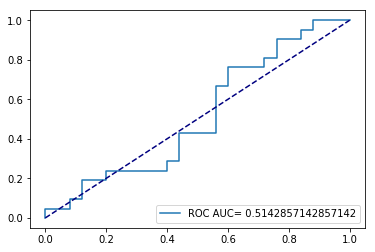

In [27]:
plt.plot(fpr,tpr,label="ROC AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.show()

## start PCA for logistic regression

In [28]:
from sklearn.decomposition import PCA

In [29]:
# can change components here to improve AUC
pca = PCA(n_components=2) 
pca.fit(x)
# pca.components_  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
new_df = pca.transform(x)

In [31]:
scalar = StandardScaler()
scalar.fit(new_df)
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, random_state=0)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

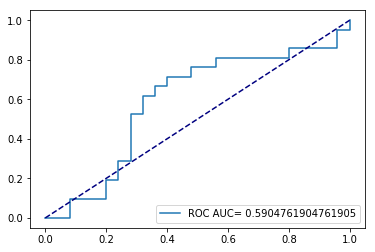

In [32]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_predict = clf.predict(X_test)
y_predict_proba = clf.predict_proba(X_test)
accuracy_score(y_predict, y_test)
fpr, tpr, _ = roc_curve(y_test,  y_predict_proba[:,1])
auc = roc_auc_score(y_test, y_predict_proba[:,1])
plt.plot(fpr,tpr,label="ROC AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc=4)
plt.show()

## try cross validation to see average auc of logistic regression with PCA

In [80]:
from sklearn.model_selection import cross_validate
cv = cross_validate(clf,new_df,y,scoring = 'roc_auc', cv=50)
cv['test_score'].mean()


0.5838888888888889

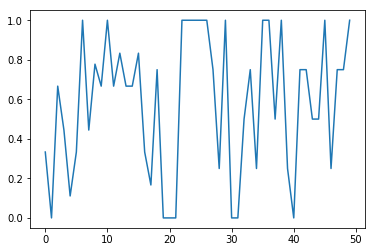

In [81]:
plt.plot(cv['test_score'])

## use statsmodel package to see logistic regression result

In [83]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [89]:
# original data without PCA
logit = sm.Logit(y, x)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.636062
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  229
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                           27
Date:                Sat, 16 Mar 2019   Pseudo R-squ.:                 0.08174
Time:                        13:15:44   Log-Likelihood:                -145.66
converged:                       True   LL-Null:                       -158.62
                                        LLR p-value:                    0.5224
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Audi                                  -0.0002      0.000    

In [91]:
# use PCA - 2 components
logit1 = sm.Logit(y, new_df)
result1 = logit1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.686947
         Iterations 2
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  229
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 Mar 2019   Pseudo R-squ.:                0.008277
Time:                        13:16:46   Log-Likelihood:                -157.31
converged:                       True   LL-Null:                       -158.62
                                        LLR p-value:                    0.1051
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -7.89e-07   4.76e-07     -1.659      0.097   -1.72e-06    1.43e-07
x2         -1.987e-07   9.86e

## see PCA component effect: how does # of components affect the classification result

In [95]:
auc_plot = [None]*10
for i in range(1,11):
    pca = PCA(n_components=i) 
    pca.fit(x)
    new_df = pca.transform(x)
    scalar = StandardScaler()
    scalar.fit(new_df)
    X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, random_state=0)
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    y_predict_proba = clf.predict_proba(X_test)
    auc_plot[i-1] = roc_auc_score(y_test, y_predict_proba[:,1])
auc_

## start SVM

In [76]:
from sklearn.svm import SVC

In [78]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_proba = svc.predict_proba(X_test)[:,1]
y_pred = svc.predict(X_test)

# Returns the mean accuracy
svc.score(X_test,y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4473684210526316

In [79]:
# try cross validation for SVM
cv1 = cross_validate(svc,x,y,scoring = 'roc_auc', cv=50)
cv1['test_score'].mean()

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

0.5

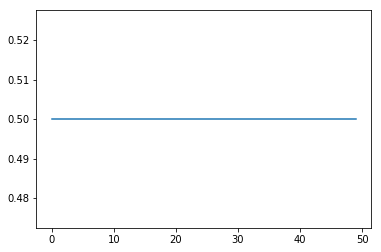

In [82]:
plt.plot(cv1['test_score'])